In [1]:
from experiment import BSDSExperimentDeblurring , SAVES_PATH
import matplotlib.pyplot as plt

2025-07-18 17:58:10.679206: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-18 17:58:10.688270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-18 17:58:10.698995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-18 17:58:10.702271: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-18 17:58:10.710959: I tensorflow/core/platform/cpu_feature_guar

In [2]:
experiment = BSDSExperimentDeblurring("./BSDS300/", saves_path=SAVES_PATH)

Training Pictures found: 200
Evaluation Pictures found: 100
Tests/Saves/Gaussian/BSDS/Adversarial_Regulariser/BSDS_Deconv_n0.005_5X5_sig1/checkpoints/ckpt-100
Restored from Tests/Saves/Gaussian/BSDS/Adversarial_Regulariser/BSDS_Deconv_n0.005_5X5_sig1/checkpoints/ckpt-100, step=991


In [4]:
y, x_true, fbp = experiment.generate_training_data(64)

In [5]:
def plot_sample_images(n_rows, y, x_true, guess):
    fig, ax = plt.subplots(nrows=n_rows, ncols=3,figsize=(10,n_rows*3))

    for i,row in enumerate(ax):
        row[0].imshow(x_true[i])
        row[0].get_xaxis().set_ticks([])
        row[0].get_yaxis().set_ticks([])
        
        row[1].imshow(y[i])
        row[1].get_xaxis().set_ticks([])
        row[1].get_yaxis().set_ticks([])

        
        row[2].imshow(guess[i])
        row[2].get_xaxis().set_ticks([])
        row[2].get_yaxis().set_ticks([])
        
        
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.413066..1.47311].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.470222..1.32546].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00163652..1.01417].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.428114..1.51373].


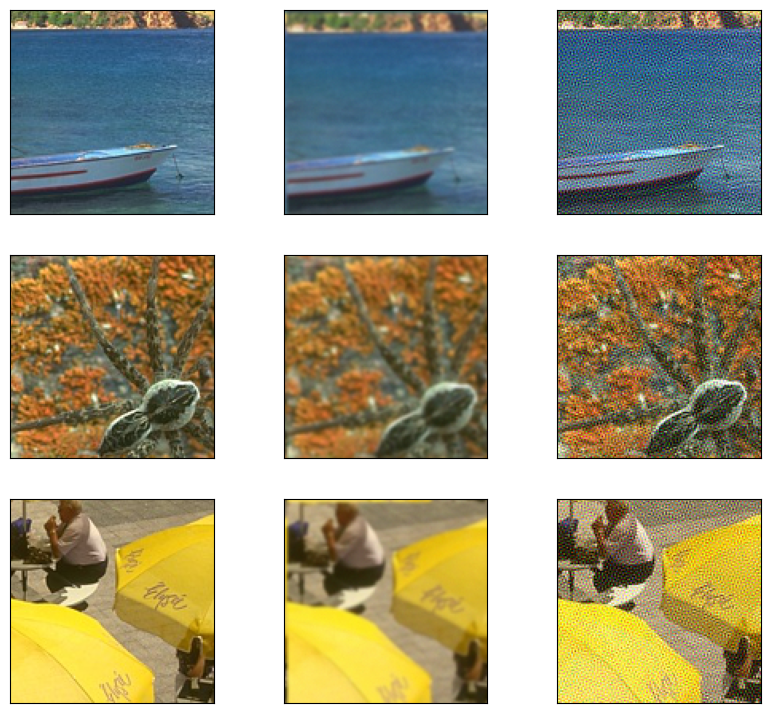

In [6]:
plot_sample_images(3, y, x_true, fbp)

In [7]:
results = experiment.reconstruct(y, 200)

2025-07-18 17:58:46.738935: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: while/body/_30/while/StatefulPartitionedCall_1/cond/branch_executed/_565


2025-07-18 17:58:48.961916: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: while/body/_30/while/StatefulPartitionedCall_1/cond/branch_executed/_565


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.413066..1.47311].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0302284..1.19491].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.470222..1.32546].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0545292..1.09189].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.428114..1.51373].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.135593..1.2135].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.501706..1.60697].
Clippi

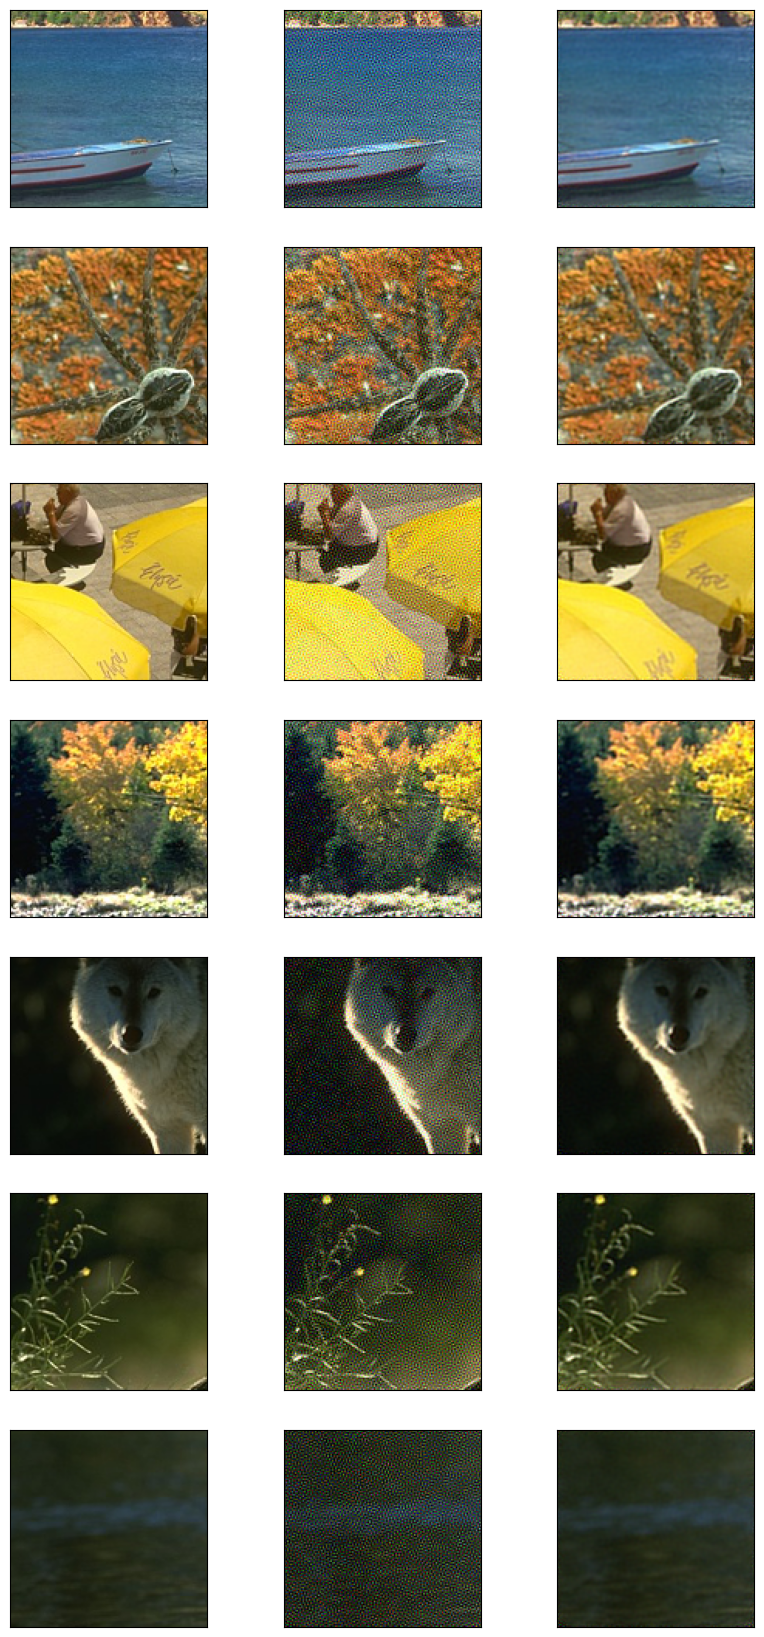

In [9]:
plot_sample_images(7, fbp, x_true, results)

In [10]:
import tensorflow as tf
def print_metrics(results, x_true, y):
    mean_ssim_reconstructed = tf.reduce_mean(tf.image.ssim(x_true, results, max_val=1.0))
    mean_ssim_noisy = tf.reduce_mean(tf.image.ssim(x_true, y,max_val=1.0))
                                     
    mean_psnr_reconstructed = tf.reduce_mean(tf.image.psnr(x_true, results,max_val=1.0))
    mean_psnr_noisy = tf.reduce_mean(tf.image.psnr(x_true, y,max_val=1.0))

    print("Mean PSNR Noisy (db) : ", mean_psnr_noisy.numpy())
    print("Mean PSNR Reconstructed (db) : " , mean_psnr_reconstructed.numpy())
    print("Mean SSIM Noisy (db) : ", mean_ssim_noisy.numpy())
    print("Mean SSIM Reconstructed (db) : " , mean_ssim_reconstructed.numpy())
    
                                     

In [14]:
print_metrics(results, x_true, y)

Mean PSNR Noisy (db) :  20.6013
Mean PSNR Reconstructed (db) :  31.052
Mean SSIM Noisy (db) :  0.477161
Mean SSIM Reconstructed (db) :  0.916706


In [15]:
y, x_true, fbp = experiment.generate_training_data(1000)

In [16]:
gt_wass = experiment.network.netw(x_true)
rec_wass = experiment.network.netw(fbp)

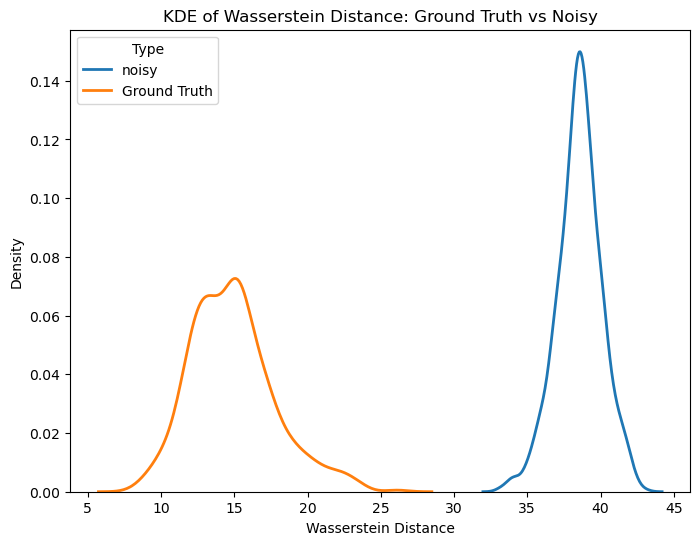

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rec_wass = np.array(rec_wass, dtype=float)
gt_wass  = np.array(gt_wass, dtype=float)

# Build DataFrame
df = pd.DataFrame({
    'Wasserstein Distance': np.concatenate([rec_wass, gt_wass]).flatten(),
    'Type': ['noisy'] * len(rec_wass) + ['Ground Truth'] * len(gt_wass)
})

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df,
    x='Wasserstein Distance',
    hue='Type',
    linewidth=2
)

plt.xlabel('Wasserstein Distance')
plt.ylabel('Density')
plt.title('KDE of Wasserstein Distance: Ground Truth vs Noisy')
plt.show()
